<img src = "https://drive.google.com/uc?export=view&id=1lrzkRlmABf8ZwwCzsSvo0b2lW_IhZXkv" alt = "Encabezado MLDS" width = "100%">  </img>


# **Preparación de los datos**
---

Este notebook es una plantilla que le puede servir como guía para el tercer entregable del proyecto aplicado.

## **0. Integrantes del equipo de trabajo**
---

Por favor incluya los nombres completos y número de identificación de los integrantes del equipo de trabajo:

1. ---**Angélica María Amaya Giraldo**---
2. ---**Juan Pablo Ospino**---
3. ---**Cristhian Cordoba**---




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('https://dataanaliticaunal.s3.us-east-2.amazonaws.com/exportdata/export_all.csv')

<ipython-input-2-aacd97707e77>:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://dataanaliticaunal.s3.us-east-2.amazonaws.com/exportdata/export_all.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3310033 entries, 0 to 3310032
Data columns (total 73 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   FECHA_PROCESO                  int64  
 2   NUMERO_SERIE                   int64  
 3   OFICINA                        int64  
 4   COD_ADUANA_DESPACHO            int64  
 5   ADUANA_DESPACHO                object 
 6   TIPO_IDENT                     int64  
 7   NIT_EXPORTADOR                 float64
 8   TIPO_USUARIO                   int64  
 9   COD_USUARIO                    int64  
 10  CLASE_EXPORTADOR               int64  
 11  COD_DPTO_EXPORTADOR            int64  
 12  COD_PAIS_DESTINO_NUM           int64  
 13  COD_PAIS_DESTINO_ALF           object 
 14  COD_PAIS_DESTINO               object 
 15  PAIS_DESTINO_FINAL             object 
 16  CIUDAD_DESTINATARIO            object 
 17  NUM_SOLICITUD_AUTO_EMBARQUE    float64
 18  TI

In [4]:
df_export = df.copy()

## **1. Limpieza de los Datos**
---

La elección de las técnicas de preprocesamiento puede diferir en cada conjunto de datos. Recuerde que es posible aplicar, según sea necesario (no necesariamente todas), las técnicas generales que se han explorado en el curso. La elección dependerá del tipo de datos con el que esté trabajando.

A lo largo de esta entrega, busque responder las siguientes preguntas:

- ¿Cuáles fueron los criterios utilizados para identificar y tratar valores atípicos, datos faltantes o cualquier otra anomalía en el conjunto de datos durante el proceso de limpieza?
- ¿Cómo se justificaría la necesidad de cada paso de preprocesamiento en términos de mejora de la calidad de los datos y preparación para el análisis subsiguiente?

A continuación encontrará los puntos a tratar a medida que va realizando la preparación de los datos. En cada punto defina el estado en que se encontraba el dataset, ademas de explicar y justificar las acciones y decisiones que se tomaron.

### **1.1. Valores faltantes**
---
Al encontrarnos con valores faltantes en el conjunto de datos, es crucial preguntarse:
* ¿Cómo afectan estos valores a la integridad y representatividad de la información?
* ¿Cómo se identificaron los valores faltantes en el conjunto de datos?
* ¿Cuáles fueron los criterios para decidir si rellenar con valores estimados o eliminar los valores faltantes? En caso que aplique, ¿qué método de relleno se utilizó y por qué se consideró apropiado?
* ¿Se realizó un análisis de la distribución de los valores faltantes en relación con las variables clave? Por ejemplo, si hay valores faltantes en una variable crítica, ¿cómo podría afectar la interpretación de los resultados?

###Identificación de los valores faltantes y criterios para rellenar valores estimados.

1) Se utilizó el comando isnull y se agruparon los resultados. se evidenció que las columnas que contenían valores vacios eran:




*   NIT_EXPORTADOR. Dado que es el identificador del exportador, no es inforamción directa del producto a exportar. Se remueve del data frame.
*   COD_PAIS_DESTINO. Se rellena con valor *otro_destino*. esto con el fin de incluir estos datos. Si bien indican no indican el destino, no dan información directa de exportaciones de los productos a los cuales hacen referencia
*   CIUDAD_DESTINATARIO. Se rellena con valor *otro_destino*. esto con el fin de incluir estos datos. Si bien indican no indican el destino, no dan información directa de exportaciones de los productos a los cuales hacen referencia.
*   NUM_SOLICITUD_AUTO_EMBARQUE. Número identificador del envío. NO representa inforamción del producto y las condiciones para su exportación. Se remueven del dataframe.
*   COD_MODALIDAD_PRECEDENTE. Dado el volumen de los datos faltantes, se toma la desición de retirar la columna del dataframe.
*   COD_NACIONALIDAD_BANDERA. Dada la cantidad, se llenan con valor OTP.
*   DIREC_EXPORTADOR. Dirección del exportador. No proporciona información a cerca de la exportación. Se remueve del data frame.
*   NIT_DECLARANTE. Número identificación del exportador. No proporciona información a cerca de la exportación. Se remueve del data frame.
*   RAZON_SOCIAL_DESTINATARIO. Nombre del exportador. No proporciona información a cerca de la exportación. Se remueve del data frame.
*   DOMICILIO_DESTINATARIO. Ubicación del destinatario. Ya tenemos una columna de la ciudad del destinatario. Se remueve del data frame.

2) Adicional a esto, si bien no tienen valores nulos, se retiran las columnas RAZON_SOCIAL_EXPORTADOR y RAZON_SOCIAL_DECLARANTE dado que No proporciona información a cerca de la exportación.

3) En las variables CIUDAD_DESTINATARIO y COD_NACIONALIDAD_BANDERA fueron imputados los valores nulos con 'otro_destino' y 'OTP', respectivamente. Esta imputación se realizó para dar completitud a las variables dado que el conteo de nulos de las mismas es bajo, donde el % de nulos sobre el total es de 0.04% y 0.0001%.

In [5]:
row_null = df_export.isnull().sum()
row_null[row_null > 0]

,0
NIT_EXPORTADOR,21853
COD_PAIS_DESTINO,2
CIUDAD_DESTINATARIO,1461
NUM_SOLICITUD_AUTO_EMBARQUE,2338
COD_MODALIDAD_PRECEDENTE,3270337
COD_NACIONALIDAD_BANDERA,3
DIREC_EXPORTADOR,21856
NIT_DECLARANTE,2375
RAZON_SOCIAL_DESTINATARIO,192
DOMICILIO_DESTINATARIO,240


In [6]:
cols_nulos = row_null[row_null > 0].index.tolist()
for columna in cols_nulos:
    cantidad_nulos = df_export[columna].isnull().sum()
    proporcion_nulos = (cantidad_nulos / df_export.shape[0]) * 100
    print(f"La cantidad de valores nulos en la columna '{columna}' es: {cantidad_nulos} y su proporción sobre el total es {proporcion_nulos:.2f}%.")

La cantidad de valores nulos en la columna 'NIT_EXPORTADOR' es: 21853 y su proporción sobre el total es 0.66%.
La cantidad de valores nulos en la columna 'COD_PAIS_DESTINO' es: 2 y su proporción sobre el total es 0.00%.
La cantidad de valores nulos en la columna 'CIUDAD_DESTINATARIO' es: 1461 y su proporción sobre el total es 0.04%.
La cantidad de valores nulos en la columna 'NUM_SOLICITUD_AUTO_EMBARQUE' es: 2338 y su proporción sobre el total es 0.07%.
La cantidad de valores nulos en la columna 'COD_MODALIDAD_PRECEDENTE' es: 3270337 y su proporción sobre el total es 98.80%.
La cantidad de valores nulos en la columna 'COD_NACIONALIDAD_BANDERA' es: 3 y su proporción sobre el total es 0.00%.
La cantidad de valores nulos en la columna 'DIREC_EXPORTADOR' es: 21856 y su proporción sobre el total es 0.66%.
La cantidad de valores nulos en la columna 'NIT_DECLARANTE' es: 2375 y su proporción sobre el total es 0.07%.
La cantidad de valores nulos en la columna 'RAZON_SOCIAL_DESTINATARIO' es: 192

In [7]:
df_export['FECHA_DECLARACION_EXPORTACION'] = pd.to_datetime(df_export['FECHA_DECLARACION_EXPORTACION'], format='%Y%m%d', errors='coerce')
df_export[['CIUDAD_DESTINATARIO']] = df_export[['CIUDAD_DESTINATARIO']].fillna(value='otro_destino')
df_export[['COD_NACIONALIDAD_BANDERA']] = df_export[['COD_NACIONALIDAD_BANDERA']].fillna(value='OTP')
df_export = df_export.drop(columns = ['Unnamed: 0','NIT_EXPORTADOR','NUM_SOLICITUD_AUTO_EMBARQUE','DIREC_EXPORTADOR', 'NIT_DECLARANTE', 'RAZON_SOCIAL_DESTINATARIO', 'DOMICILIO_DESTINATARIO','RAZON_SOCIAL_EXPORTADOR','RAZON_SOCIAL_DECLARANTE'])

### **1.2. Valores duplicados**
----
Ante la presencia de valores duplicados, es esencial reflexionar sobre su impacto en los resultados.

* ¿Cómo se identificaron y manejaron los valores duplicados en el conjunto de datos?
* ¿Hubo alguna consideración especial al tratar duplicados en función de ciertas variables?
* ¿Pueden estos duplicados sesgar el análisis, y en qué medida?
* ¿Se justifica la eliminación de duplicados para mantener la coherencia y singularidad de los datos?
* ¿Cómo se aseguró de que la eliminación de duplicados no afectara negativamente la representación del conjunto de datos?

La identificación y eliminación de duplicados busca asegurar que cada registro aporte información única y valiosa.

###Identificación y tratamiento de los datos duplicados
Los datos duplicados podrían sesgarlos resultados del análisis. Dado que cada importación se diferencián por los campos:

*   SUBPARTIDA
*   NUMERO_FORMULARIO
*   NUMERO_SERIE

Se eliminaron del dataframe los registros duplicados, dejando el primer registro a partir de las columnas identificadoras que se encontrara en la base de datos. Al final, se hace una visualización de la base resultante donde cada registro está una única vez.



In [8]:
df_export=df_export.drop_duplicates()
df_export_2 = df_export.drop_duplicates(subset=['SUBPARTIDA','NUMERO_FORMULARIO','NUMERO_SERIE'], keep='first')
df_export_2.shape

(3134864, 64)

In [9]:
df_export.shape

(3136181, 64)

In [10]:
base_ids = df_export_2.groupby(['SUBPARTIDA', 'NUMERO_FORMULARIO', 'NUMERO_SERIE']).size().reset_index(name='Conteo_por_grupo')
base_ids.sort_values(by='Conteo_por_grupo', ascending=False)

,SUBPARTIDA,NUMERO_FORMULARIO,NUMERO_SERIE,Conteo_por_grupo
0,101210000,6007685569670,1,1
2089914,6006310000,6007702243991,15,1
2089905,6006310000,6007702179563,6,1
2089906,6006310000,6007702179563,20,1
2089907,6006310000,6007702180951,3,1
...,...,...,...,...
1044955,2009899000,6007719830631,3,1
1044956,2009899000,6007719888580,7,1
1044957,2009899000,6007720023418,12,1
1044958,2009899000,6007720237743,3,1


### **1.3. Valores atípicos**
---
Al abordar valores atípicos, es relevante cuestionarse sobre la naturaleza de estos puntos extremos.
* ¿Son errores de medición o representan información válida pero excepcional?
* ¿Qué criterios o técnicas se utilizaron para identificar los valores atípicos?
* ¿Se aplicaron métodos estadísticos o visuales para detectar los valores atípicos?
* ¿Cuál fue la decisión final sobre cómo tratar los valores atípicos y por qué?

La elección entre eliminar o transformar estos valores debe basarse en su influencia en la distribución y la interpretación de los resultados, asegurando que el análisis refleje de manera precisa la realidad del conjunto de datos.

En el dataset vemos que hay 63 variables, y de ellas solo 9 muestran valores numéricos. Las variable categóricas son indicadoras como código de país, código de departamento, código de envío, forma de embarque, bandera, etc., así que estas variables no tienen un sentido lógico para ser analizadas a partir de una distribución.

De las variables numéricas se muestra que todas muestran valores atípicos propios de una mala praxis de los digitadores o dueños de las bases de datos. Al gráficar o listar los valores de las variables se observa que hay gran cantidad de valores únicos que no tienen sentido como, por ejemplo, que el precio de un flete sea de 686465 USD. Estos valores atípicos son identificados y eliminados a partir de la definición de un valor atípico como aquel que sale por fuera del rango superior del rango interquantílico.

Luego de eliminar valores atípicos en las columnas numéricas, la cantidad de registros pasó de 3.134.864 a 991.432 registros.

### Identificación y tratamiento de datos atípicos

In [28]:
cols_numericas = [   "CANTIDAD_UNIDADES_FISICAS",
    "PESO_BRUTO_KGS",
    "PESO_NETO_KGS",
    "VALOR_FOB_USD",
    "VALOR_FOB_PESOS",
    "VLR_SERIE_AGREGADO_NAL_USD",
    "VALOR_SERIE_FLETES_USD",
    "VALOR_SERIE_SEGUROS_USD",
    "VLR_SERIE_OTROS_GASTOS_USD"]

def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))

    sns.boxplot(x=df[column], color='blue')

    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)

    # Mostrar el gráfico
    plt.show()
def mostrar_valores_unicos(df, columna):
    valores_unicos = df[columna].value_counts().reset_index()
    valores_unicos.columns = [columna, 'Frecuencia']
    print(f"Valores únicos en la columna '{columna}':")
    print(valores_unicos)
    return valores_unicos

In [29]:
for col in cols_numericas:
    mostrar_valores_unicos(df_export_2, col)

Valores únicos en la columna 'CANTIDAD_UNIDADES_FISICAS':
        CANTIDAD_UNIDADES_FISICAS  Frecuencia
0                            1.00      106803
1                            2.00       44878
2                            4.00       27404
3                            3.00       25350
4                           10.00       22618
...                           ...         ...
349068                    3902.20           1
349069                  195739.20           1
349070                   99718.00           1
349071                    3674.17           1
349072                  103612.00           1

[349073 rows x 2 columns]
Valores únicos en la columna 'PESO_BRUTO_KGS':
        PESO_BRUTO_KGS  Frecuencia
0                 0.01        5015
1                 5.00        4612
2                10.00        3982
3                 1.00        3952
4                 6.00        3561
...                ...         ...
608081         1868.35           1
608082        13085.28           1
6

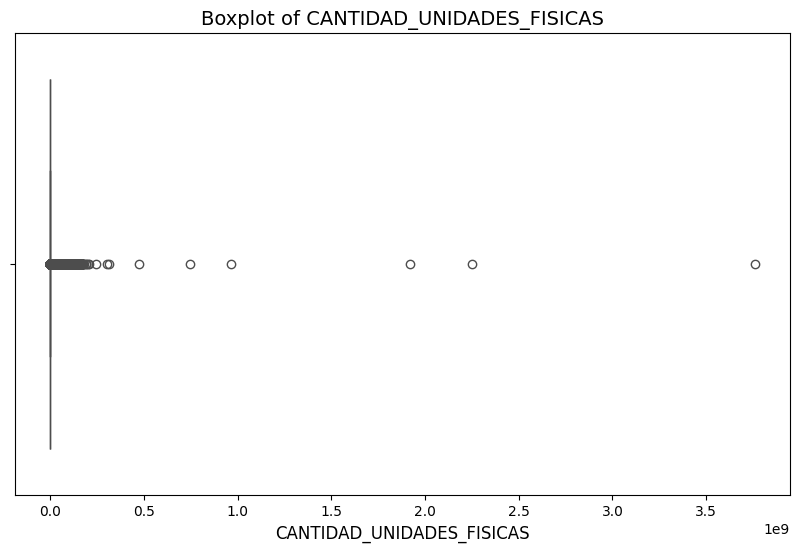

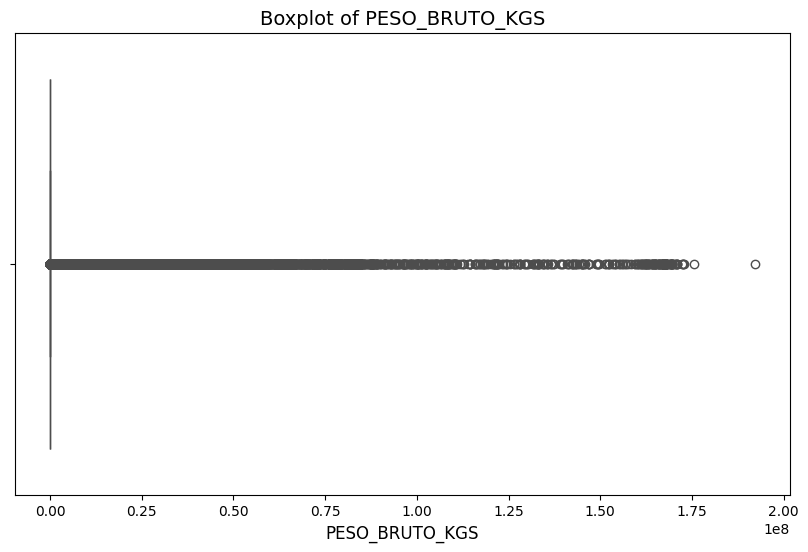

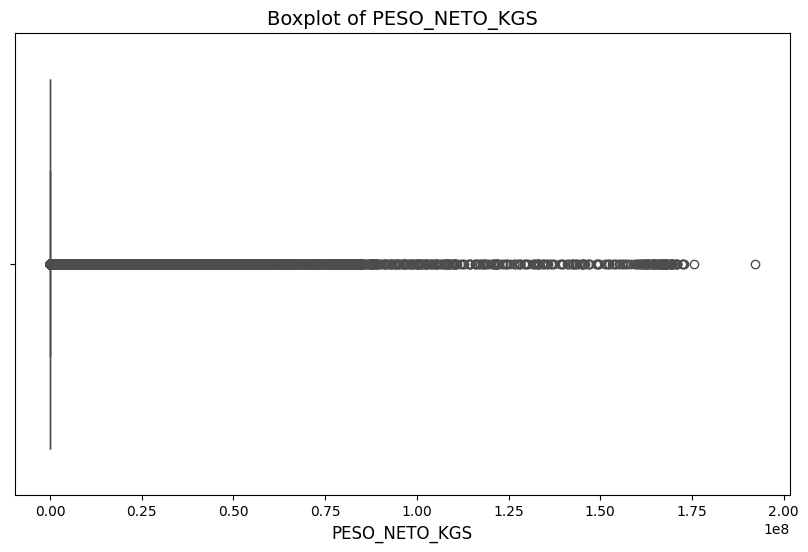

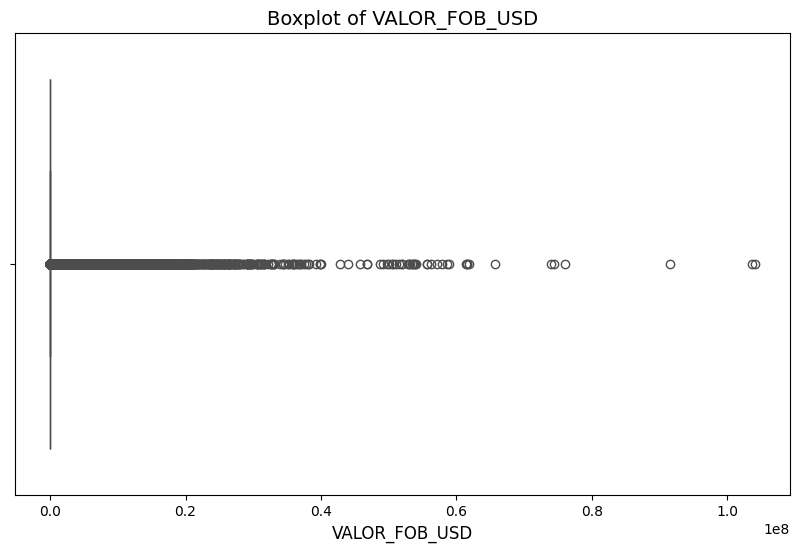

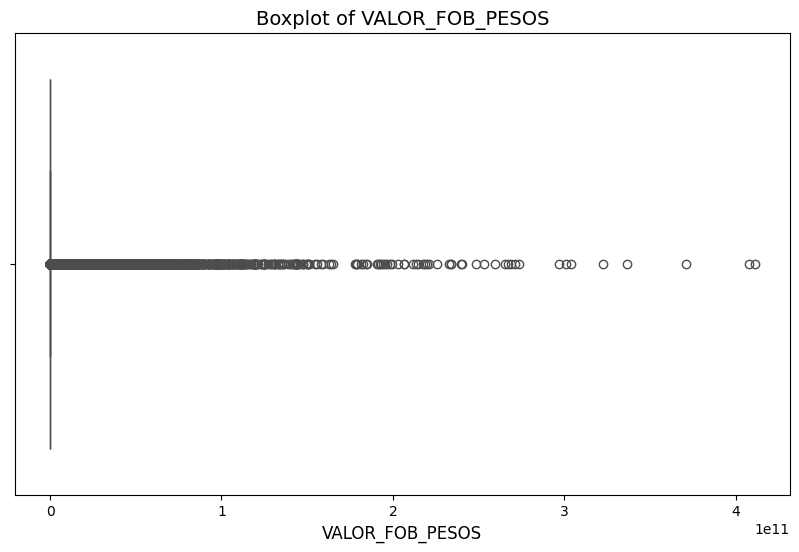

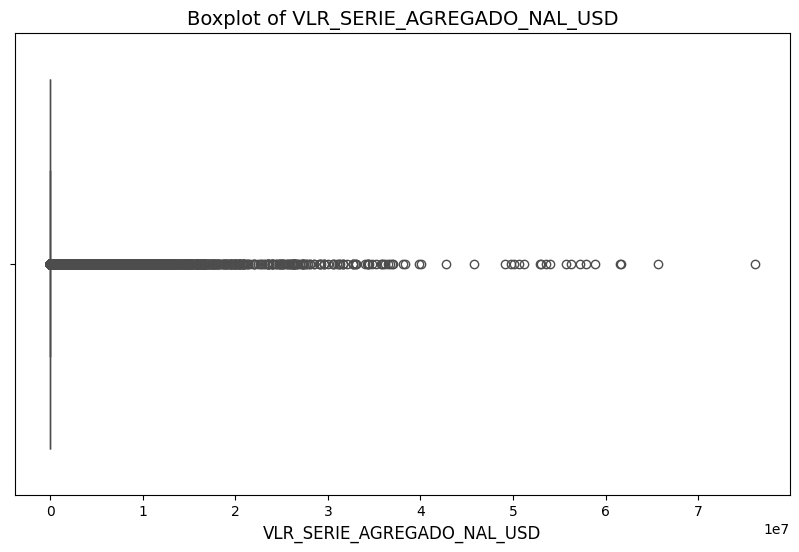

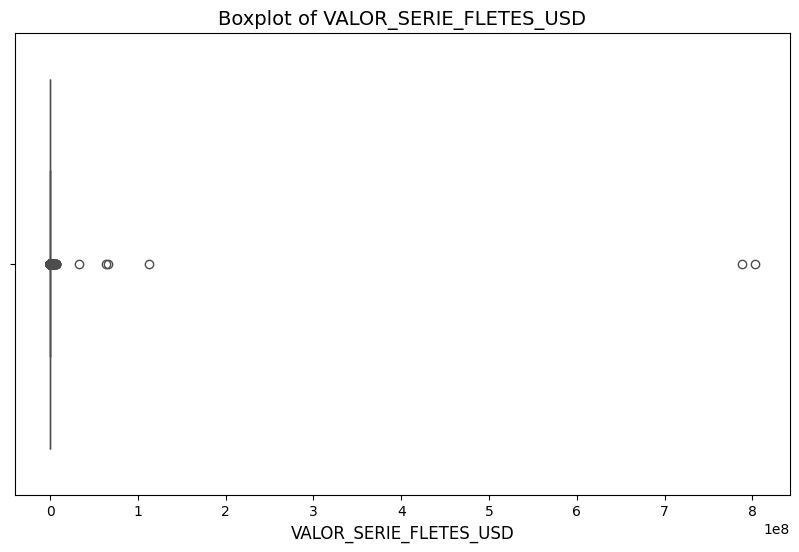

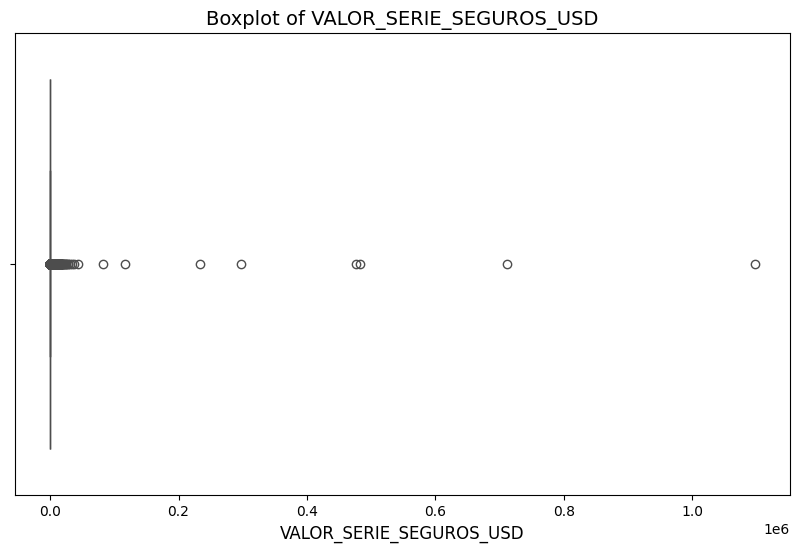

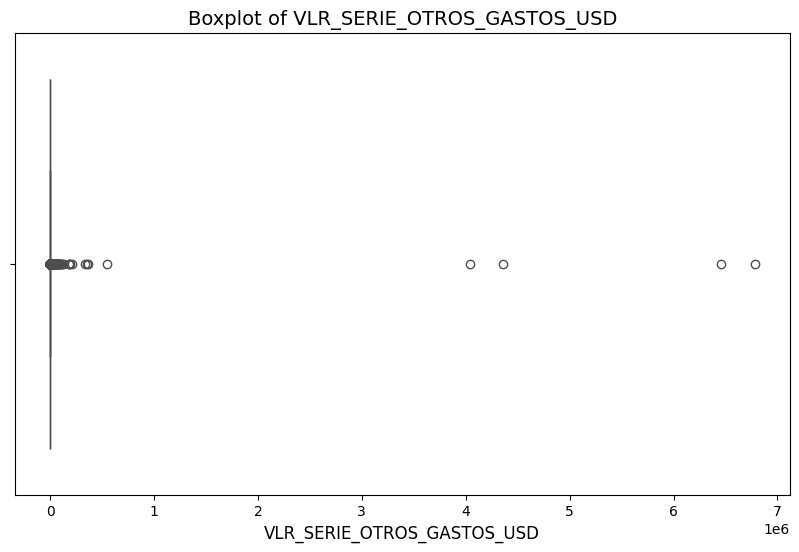

In [30]:
for col in cols_numericas:
    plot_boxplot(df_export_2, col)

In [38]:
def eliminar_atipicos(df, columnas):
    for columna in columnas:
        # Calcular los cuartiles y el rango intercuartílico (IQR)
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites inferior y superior para los valores no atípicos
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar el DataFrame para eliminar los registros atípicos
        df = df[(df[columna] >= lower_bound) & (df[columna] <= upper_bound)]

    return df

In [36]:
df_export_2_sin_atipicos = eliminar_atipicos(df_export_2, cols_numericas)

In [34]:
df_export_2.shape

(3134864, 64)

In [39]:
df_export_2_sin_atipicos.shape

(991432, 64)

### **1.4. Datos Inconsistentes**
---
Frente a inconsistencias en los datos, es importante analizar cómo estas discrepancias podrían afectar la comparabilidad y comprensión de la información.

* ¿Cómo se identificaron las inconsistencias en los datos?
* ¿Las inconsistencias son lo suficientemente significativas como para justificar una estandarización?
* ¿Cómo se pueden homogeneizar unidades y formatos para garantizar coherencia en el análisis?
* ¿Qué estrategias se implementaron para abordar las inconsistencias y asegurar la coherencia?
* ¿Se establecieron reglas de validación específicas para garantizar la consistencia?

Se hizo una revisón exhaustiva de los datos variable por variable, en donde no encontramos incosistencias para las variables categóricas dado que son tomadas como variables indicadoras. Para las variables numéricas nos llama la atención la variable de **VLR_SERIE_AGREGADO_NAL_USD** pues el 82% de sus registros están en 0, sin embargo, esto puede ser una característica válida de los datos.

In [42]:
def create_decile_table(df, column):
    df = df.copy()
    print("Variable: {0}".format(column))
    # Identify NaN values and assign them a separate group
    df.loc[df[column].isnull(), 'decile'] = -1
    # Identify zero values and assign them a separate group
    df.loc[df[column] == 0, 'decile'] = 0
    # Calculate deciles only for positive values
    df.loc[df[column] > 0, 'decile'] = pd.qcut(df.loc[df[column] > 0, column], 9, labels=False, duplicates='drop') + 1
    # Create a table with min, max values, count of cases and % of total cases per decile
    table = df.groupby('decile').agg(
        min_value=(column, 'min'),
        max_value=(column, 'max'),
        count=(column, 'count')
    ).reset_index()
    # Calculate % of total cases
    total_cases = table['count'].sum()
    table['% of total cases'] = 100 * table['count'] / total_cases
    # Call analyze_column function
    #analyze_result = analyze_column(df, 'decile')
    #return table, analyze_result
    return table

In [43]:
for col in cols_numericas:
    table = create_decile_table(df_export_2_sin_atipicos, col)
    display(table)

Variable: CANTIDAD_UNIDADES_FISICAS


,decile,min_value,max_value,count,% of total cases
0,1.0,0.01,3.00,122962,12.402464
1,2.0,3.01,9.40,97376,9.821753
2,3.0,9.41,21.02,110157,11.110898
3,4.0,21.03,46.15,110147,11.109890
4,5.0,46.16,95.00,110612,11.156791
5,6.0,95.01,196.31,109700,11.064803
6,7.0,196.32,432.00,110301,11.125423
7,8.0,432.08,1450.00,110198,11.115034
8,9.0,1451.00,11360.00,109979,11.092944


Variable: PESO_BRUTO_KGS


,decile,min_value,max_value,count,% of total cases
0,1.0,0.01,1.96,110290,11.124313
1,2.0,1.97,5.65,110276,11.122901
2,3.0,5.66,11.76,109918,11.086792
3,4.0,11.77,21.70,110155,11.110696
4,5.0,21.71,38.02,110165,11.111705
5,6.0,38.03,65.65,110159,11.111100
6,7.0,65.66,119.65,110151,11.110293
7,8.0,119.66,248.66,110162,11.111402
8,9.0,248.67,2036.89,110156,11.110797


Variable: PESO_NETO_KGS


,decile,min_value,max_value,count,% of total cases
0,1.0,0.01,1.72,110366,11.131979
1,2.0,1.73,5.00,117598,11.861429
2,3.0,5.01,10.00,104263,10.516405
3,4.0,10.01,19.00,109556,11.050279
4,5.0,19.01,33.00,110204,11.115639
5,6.0,33.01,57.60,109108,11.005092
6,7.0,57.61,103.50,110045,11.099601
7,8.0,103.51,216.00,110559,11.151446
8,9.0,216.01,687.27,109733,11.068132


Variable: VALOR_FOB_USD


,decile,min_value,max_value,count,% of total cases
0,1.0,0.01,28.50,110283,11.123607
1,2.0,28.51,75.77,110037,11.098794
2,3.0,75.78,143.60,110159,11.111100
3,4.0,143.61,232.24,110158,11.110999
4,5.0,232.25,353.92,110160,11.111201
5,6.0,353.93,537.44,110157,11.110898
6,7.0,537.45,890.74,110159,11.111100
7,8.0,890.75,1500.00,110405,11.135912
8,9.0,1500.01,3235.00,109914,11.086388


Variable: VALOR_FOB_PESOS


,decile,min_value,max_value,count,% of total cases
0,1.0,37.23,119288.48,110160,11.111201
1,2.0,119289.56,317198.16,110159,11.111100
2,3.0,317199.35,599299.37,110158,11.110999
3,4.0,599304.30,973519.43,110160,11.111201
4,5.0,973521.30,1483124.58,110159,11.111100
5,6.0,1483125.89,2261968.12,110158,11.110999
6,7.0,2261971.17,3738056.40,110159,11.111100
7,8.0,3738094.35,6302111.55,110160,11.111201
8,9.0,6302147.69,12046939.24,110159,11.111100


Variable: VLR_SERIE_AGREGADO_NAL_USD


,decile,min_value,max_value,count,% of total cases
0,0.0,0.00,0.00,818019,82.508836
1,1.0,0.01,31.45,19276,1.944258
2,2.0,31.46,61.67,19263,1.942947
3,3.0,61.68,95.09,19269,1.943552
4,4.0,95.10,132.76,19268,1.943451
5,5.0,132.77,176.93,19265,1.943149
6,6.0,176.94,226.84,19271,1.943754
7,7.0,226.85,283.26,19266,1.943250
8,8.0,283.27,346.86,19269,1.943552
9,9.0,346.87,419.45,19266,1.943250


Variable: VALOR_SERIE_FLETES_USD


,decile,min_value,max_value,count,% of total cases
0,0.0,0.0,0.0,991432,100.0


Variable: VALOR_SERIE_SEGUROS_USD


,decile,min_value,max_value,count,% of total cases
0,0.0,0.0,0.0,991432,100.0


Variable: VLR_SERIE_OTROS_GASTOS_USD


,decile,min_value,max_value,count,% of total cases
0,0.0,0.0,0.0,991432,100.0


### **1.5. Datos corruptos**
---
En la detección de datos corruptos, pregunte si hay posibles errores de entrada o problemas de transferencia que podrían haber afectado la integridad de los datos.
* ¿Cómo se determinó la presencia de datos corruptos en el conjunto de datos?
* ¿Qué medidas se tomaron para corregir o eliminar los datos corruptos?
* ¿Hubo casos en los que la corrupción de datos no pudo ser manejada y cómo se justificó esa decisión?

Identificamos datos corruptos en las variables VALOR_SERIE_FLETES_USD, VALOR_SERIE_SEGUROS_USD, y VLR_SERIE_OTROS_GASTOS_USD. Estas tres variables cuentan con valores nulos en todas las celdas, por tanto, son eliminadas del análisis.

---



In [44]:
cols_corruptas=['VALOR_SERIE_FLETES_USD', 'VALOR_SERIE_SEGUROS_USD', 'VLR_SERIE_OTROS_GASTOS_USD']

In [45]:
for col in cols_corruptas:
    table = create_decile_table(df_export_2_sin_atipicos, col)
    display(table)

Variable: VALOR_SERIE_FLETES_USD


,decile,min_value,max_value,count,% of total cases
0,0.0,0.0,0.0,991432,100.0


Variable: VALOR_SERIE_SEGUROS_USD


,decile,min_value,max_value,count,% of total cases
0,0.0,0.0,0.0,991432,100.0


Variable: VLR_SERIE_OTROS_GASTOS_USD


,decile,min_value,max_value,count,% of total cases
0,0.0,0.0,0.0,991432,100.0


In [48]:
for col in cols_corruptas:
    mostrar_valores_unicos(df_export_2_sin_atipicos, col)

Valores únicos en la columna 'VALOR_SERIE_FLETES_USD':
   VALOR_SERIE_FLETES_USD  Frecuencia
0                     0.0      991432
Valores únicos en la columna 'VALOR_SERIE_SEGUROS_USD':
   VALOR_SERIE_SEGUROS_USD  Frecuencia
0                      0.0      991432
Valores únicos en la columna 'VLR_SERIE_OTROS_GASTOS_USD':
   VLR_SERIE_OTROS_GASTOS_USD  Frecuencia
0                         0.0      991432


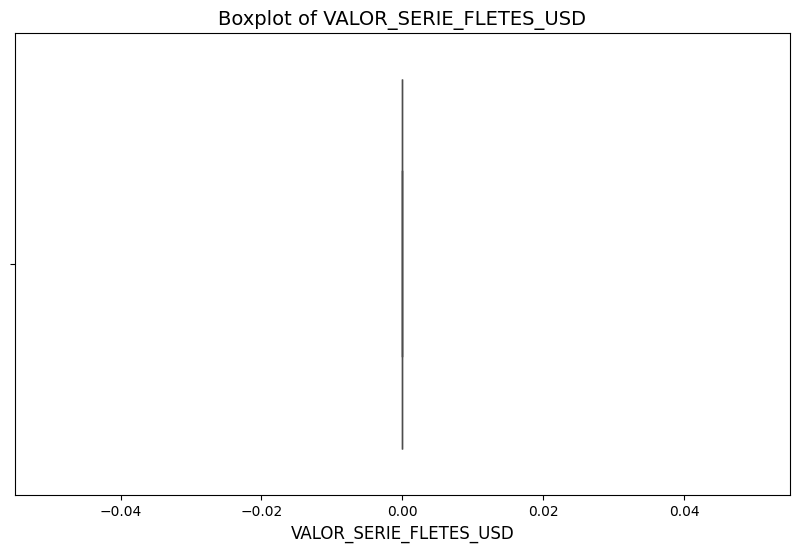

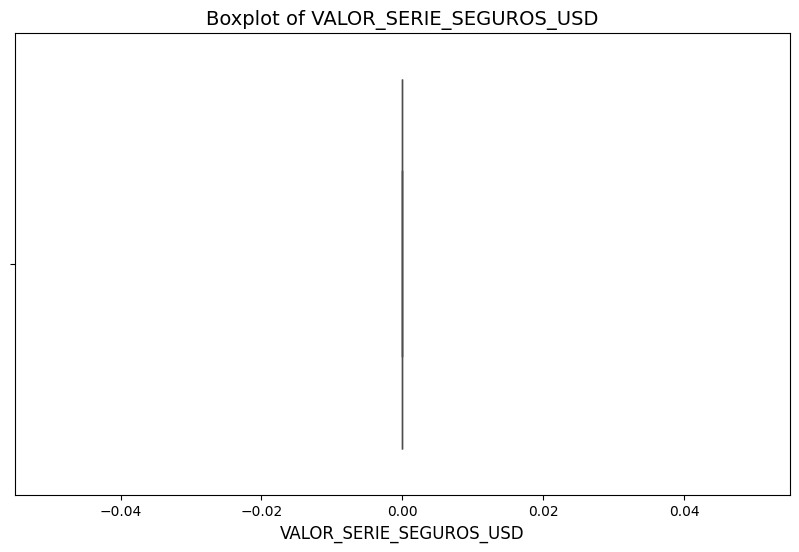

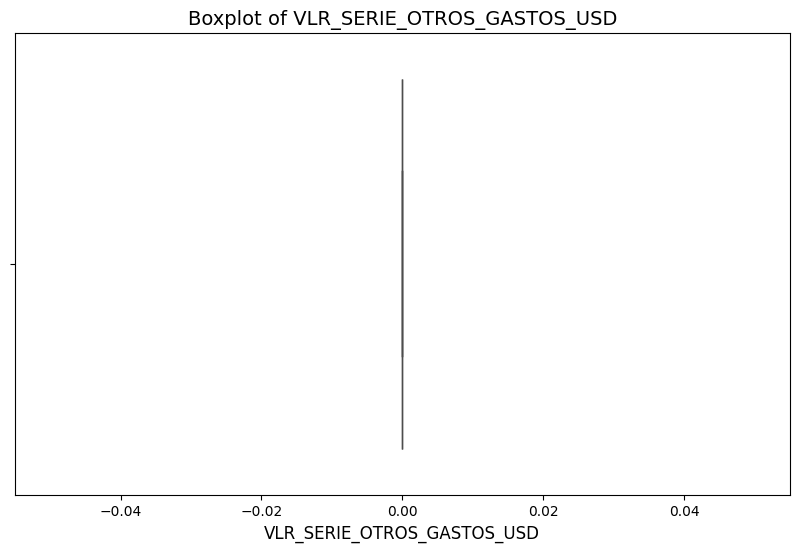

In [49]:
for col in cols_corruptas:
    plot_boxplot(df_export_2_sin_atipicos, col)

In [52]:
df_export_2_sin_atipicos[cols_corruptas].head()

,VALOR_SERIE_FLETES_USD,VALOR_SERIE_SEGUROS_USD,VLR_SERIE_OTROS_GASTOS_USD
0,0.0,0.0,0.0
8,0.0,0.0,0.0
15,0.0,0.0,0.0
17,0.0,0.0,0.0
18,0.0,0.0,0.0


In [53]:
df_export_2_sin_atipicos_2 = df_export_2_sin_atipicos.drop(columns=cols_corruptas)

### **1.6. Selección de datos**
---
En la selección de datos, reflexione sobre las variables que son realmente relevantes para sus objetivos de análisis.
* ¿Qué criterios se utilizaron para seleccionar los datos relevantes para el análisis?
* ¿Se aplicaron técnicas de muestreo o filtrado para reducir el tamaño del conjunto de datos?
* ¿Cómo se justificó la inclusión o exclusión de ciertas variables en la selección de datos?

Finalmente, la selección de variables corresponde a todo el proceso de filtrado y análisis previo. La base resultante se guarda en un dataframe llamado "df_procesado". Esta base no es un subconjunto de la base inicial, sino que corresponde a la totalidad de nuestra muestra luego de todo el procesamiento descrito. Adicionalmente, no se incluyen o excluyen variables externas al procesamiento realizado.

In [57]:
df_procesado = df_export_2_sin_atipicos_2
pd.set_option('display.max_columns', None)
pd.concat([df_procesado.head(2), df_procesado.tail(2)])

,FECHA_PROCESO,NUMERO_SERIE,OFICINA,COD_ADUANA_DESPACHO,ADUANA_DESPACHO,TIPO_IDENT,TIPO_USUARIO,COD_USUARIO,CLASE_EXPORTADOR,COD_DPTO_EXPORTADOR,COD_PAIS_DESTINO_NUM,COD_PAIS_DESTINO_ALF,COD_PAIS_DESTINO,PAIS_DESTINO_FINAL,CIUDAD_DESTINATARIO,TIPO_DECLARACION,TIPO_DESPACHO,COD_LUGAR_SALIDA_NUM,COD_LUG_SALIDA_ALF,COD_REGION_PROCEDENCIA,REGION_PROCEDENCIA,NUM__DECLA_EXPORTACION_ANT,FECH_DECLA_EXPORTACION_ANT,NUM_DECLARACION_PRECEDENTE,FECH_DECLA_PRECEDENTE,COD_MODALIDAD_PRECEDENTE,COD_MONEDA_TRANSACCION,COD_MODO_TRANSPORTE,MODO_TRANSPORTE,BANDERA,COD_NACIONALIDAD_BANDERA,NACIONALIDAD_BANDERA,COD_REGIMEN_CAN,COD_MODALIDAD_EXPORTACION,MODALIDAD_EXPORTACION,FORMA_PAGO,COD_TIPO_EMBARQUE,TIPO_DE_EMBARQUE,COD_TIPO_DATOS,TIPO_DE_DATOS,TIPO_CERTIFICADO_ORIGEN,SISTEMAS_ESPECIALES,COD_EXPORTACION_TRANSITO,EXPORTACION_EN_TRANSITO,SUBPARTIDA,COD_REGION_ORIGEN,REGION_DE_ORIGEN,COD_UNIDAD_FISICA_NUM,COD_UNIDAD_FISICA_ALF,UNIDAD_FISICA,CANTIDAD_UNIDADES_FISICAS,PESO_BRUTO_KGS,PESO_NETO_KGS,VALOR_FOB_USD,VALOR_FOB_PESOS,VLR_SERIE_AGREGADO_NAL_USD,COD_ADUANA_SALIDA,ADUANA_SALIDA,FECHA_SOLICITUD_AUTO_EMBARQUE,NUMERO_FORMULARIO,FECHA_DECLARACION_EXPORTACION
0,202201,27,99,3,Aduanas de Bogotá-El Dorado,2,7,0,2,25286,309,GLP,GP,GUADALUPE,POINTE A PITRE,1,Inicial,3,BOG,25,CUNDINAMARCA,0,0,0,0,NaN,USD,4,Aéreo,13,AF,AFGANISTAN,1,198,Exportacion definitiva de mercancias de fabric...,1,2,Fraccionado,2,Definitivos despúes del embarque,5,NO,N,NO,603199090,25,CUNDINAMARCA,11,U,Unidades o artículos,600.0,12.00,12.0,286.20,1139304.96,0.00,3,Aduanas de Bogotá-El Dorado,202109,6007690036978,2022-01-21
8,202201,43,99,48,Aduanas de Cartagena,2,36,0,2,11001,83,BRB,BB,BARBADOS,BRIDGETOWN,1,Inicial,48,CTG,5,ANTIOQUIA,0,0,0,0,NaN,COP,1,Marítimo,23,DE,ALEMANIA,1,198,Exportacion definitiva de mercancias de fabric...,1,1,Unico,1,Definitivos al embarque,8,NO,N,NO,8714990000,11,BOGOTA DC,11,U,Unidades o artículos,326.0,95.56,91.2,669.13,2652632.05,0.00,48,Aduanas de Cartagena,202201,6007690108429,2022-01-24
3310023,202312,30,99,39,Impuestos y Aduanas de Maicao,2,36,0,2,8001,850,VEN,VE,VENEZUELA (REPÚBLICA BOLIVARIANA DE),BARINAS,1,Inicial,39,MAI,17,CALDAS,0,0,0,0,NaN,USD,3,Terrestre (carretero),850,VE,VENEZUELA (REPÚBLICA BOLIVARIANA DE),1,198,Exportación definitiva de mercancías de fabric...,1,1,Unico,1,Definitivos al embarque,8,SI,N,NO,1704901000,17,CALDAS,33,KG,Kilogramo,72.0,83.24,72.0,224.88,909689.07,224.88,39,Impuestos y Aduanas de Maicao,202311,6007725507689,2023-12-01
3310024,202312,15,99,39,Impuestos y Aduanas de Maicao,2,36,0,2,8001,850,VEN,VE,VENEZUELA (REPÚBLICA BOLIVARIANA DE),BARINAS,1,Inicial,39,MAI,17,CALDAS,0,0,0,0,NaN,USD,3,Terrestre (carretero),850,VE,VENEZUELA (REPÚBLICA BOLIVARIANA DE),1,198,Exportación definitiva de mercancías de fabric...,1,1,Unico,1,Definitivos al embarque,8,NO,N,NO,1704909000,17,CALDAS,33,KG,Kilogramo,249.6,288.59,249.6,897.00,3628562.34,0.00,39,Impuestos y Aduanas de Maicao,202311,6007725507689,2023-12-01


## **Créditos**
---

* **Profesor:** [Fabio Augusto Gonzalez](https://dis.unal.edu.co/~fgonza/)
* **Asistente docente :**
  * [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Diseño de imágenes:**
    - [Rosa Alejandra Superlano Esquibel](https://www.linkedin.com/in/alejandrasuperlano/).
* **Coordinador de virtualización:**
    - [Edder Hernández Forero](https://www.linkedin.com/in/edder-hernandez-forero-28aa8b207/).

**Universidad Nacional de Colombia** - *Facultad de Ingeniería*